# Import Libraries and Data

In [2]:
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

In [3]:
import pandas as pd
import numpy as np
import itertools

Description

In [4]:
df = pd.read_csv('Data-Collisions (1).csv')
df.head()

c:\users\reid\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data Pre-Processing Steps

* Remove NaN columns and rows
* Remove redundant/repetitive rows that include descriptions not categorical/integer types
* Change categorical variables to most frequent type
* Formate datetime objects

In [ ]:
# Identify missing values
# Convert "?" to NaN and count the number of NaN in each column

df.replace("?", np.nan, inplace = True)
df.isnull().sum()

In [5]:
# Add a count variable to the df

df["Count"] = 1

In [6]:
#drop rows with more than 50% NaNs

df.dropna(axis=0, thresh=19, inplace=True)

#drop columns with 50% or more NaNs

list = ["INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT", "SPEEDING"]
df.drop(columns=list, inplace = True)

#Remove the rows where the value is equal to NaN - ***for some reason here axis = 0 is not working
df.dropna(subset=['X'], inplace = True)

In [7]:
#Remove additional columns that are not necessary

#columns that have unique keys, and description data that is not specific

list= ["INCKEY", "COLDETKEY", "SEVERITYDESC", "ST_COLDESC", "SDOTCOLNUM"]
df.drop(columns=list, inplace = True)

# check to see if any data is missing

In [ ]:
#Let's look at the range of categorical and int variables to sees which ones are the most frequent

#COLLISIONTYPE      4904
#JUNCTIONTYPE       6329
#UNDERINFL          4884
#WEATHER            5081
#ROADCOND           5012
#LIGHTCOND          5170
#SDOTCOLNUM        79737
#ST_COLCODE           18
#ST_COLDESC         4904


#Iterate through the next two blocks and plan the transformations of null variable or if columns should be dropped

# look up a specific values
look_var = "UNDERINFL"

#Converting Ints to Str in order as a categorical variabl
#df['ST_COLCODE'] = df['ST_COLCODE'].map(str)

df[[look_var]].describe()
#df[look_var].unique() #unique is only goof for non-df types


# df looking at the count of caterigorical variables
# df.groupby(['Animal']).mean()
look_var = "UNDERINFL"

df[[look_var, 'Count']].groupby([look_var]).sum()

df.isnull().sum()

In [8]:
# Change the categorical variables to the most frequent type

df["COLLISIONTYPE"].replace(np.nan, "Unknown", inplace=True)

df["JUNCTIONTYPE"].replace(np.nan, "Unknown", inplace=True)

df["WEATHER"].replace(np.nan, "Unknown", inplace=True)

df["ROADCOND"].replace(np.nan, "Unknown", inplace=True)

df["LIGHTCOND"].replace(np.nan, "Unknown", inplace=True)

df["ST_COLCODE"].replace(np.nan, "Unknown", inplace=True)

df["UNDERINFL"].replace("N","0", inplace=True)
df["UNDERINFL"].replace("Y", "1", inplace=True)
df["UNDERINFL"].replace(np.nan, "0", inplace=True)

In [9]:
# Format datetime objects

from datetime import datetime

df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['YEAR'] = df['INCDATE'].map(lambda x: x.strftime('%Y'))
df['MONTH'] = df['INCDATE'].map(lambda x: x.strftime('%b'))
df['DAY'] = df['INCDATE'].map(lambda x: x.strftime('%a'))

In [10]:
def hr_func(ts):
    return ts.hour

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['TIME'] = df['INCDTTM'].apply(hr_func)


# Data Visualization
* Import data visualization libraries: Matplotlib and Seaborn
* Define functions to produce scatterplots, horizontal bar charts, and folium maps
* Visualize data to see determine which attributes may have the most significant influence on target (severity code and overall collision count)

In [11]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [12]:
#create scatterplot function

def scatterplot(df, x_dim, y_dim, category, maintitle, x_label, y_label):
  x = df[x_dim]
  y = df[y_dim]
  fig, ax = plt.subplots(figsize=(10, 5))
  #applies the custom color map along with the color sequence
  ax.bar(x, y, alpha=0.70)
 
  #adds a title and axes labels
  ax.set_title(maintitle)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()



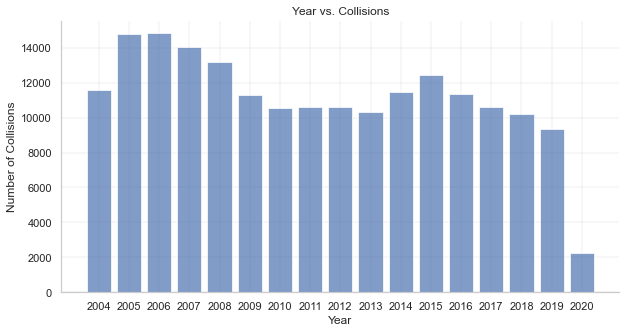

In [13]:
df1 = df.groupby('YEAR')['Count'].sum().to_frame().reset_index()

scatterplot(df1, "YEAR", "Count", "YEAR", "Year vs. Collisions", "Year", "Number of Collisions")

The collision data has been collected since 2004. After 2009 there was an reduction in total collisions, possibly due to measures to increase driver, pedestrian, and cyclist safety. 
Interestingly, collisions are much lower in 2020. This is likely due to business shut down and stay home orders due to covid-19. However the data was just recorded up to 2020 and so if trends continue, collisions should be expected to be approximately (). 

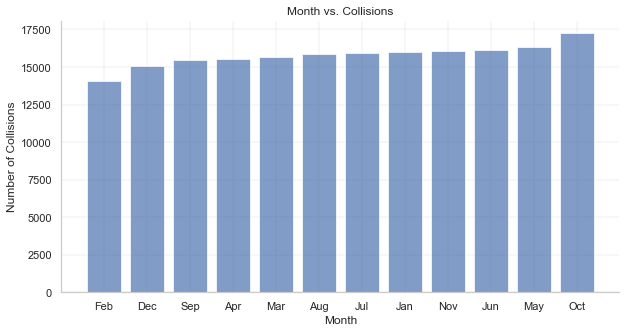

In [14]:
df2 = df.groupby('MONTH')['Count'].sum().to_frame().reset_index().sort_values(by='Count')

scatterplot(df2, "MONTH", "Count", "MONTH", "Month vs. Collisions", "Month", "Number of Collisions")

The lowest month for collisions is February and the highest month is October. The rest of the year appears to be consistent. 

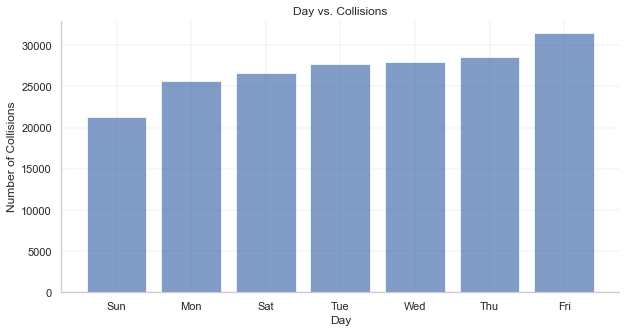

In [15]:
df3 = df.groupby('DAY')['Count'].sum().to_frame().reset_index().sort_values(by='Count')

scatterplot(df3, "DAY", "Count", "MONTH", "Day vs. Collisions", "Day", "Number of Collisions")

The day of the week also appears to be an important attribute with Friday being the day with the highest count of collisions, and Sunday is the day with the lowest. 

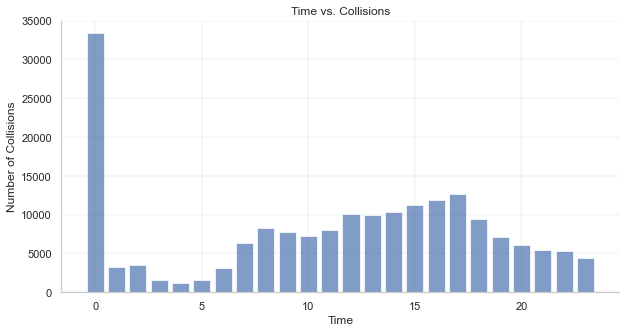

In [16]:
df4 = df.groupby('TIME')['Count'].sum().to_frame().reset_index().sort_values(by='Count')

scatterplot(df4, "TIME", "Count", "TIME", "Time vs. Collisions", "Time", "Number of Collisions")

By viewieing the data set, it appears as though many entries are missing the time and have been incorrectly put to 0 (24:00/12:00AM). 
Therefore, it will be assumed here that no "jump/spike" occured at 24:00, but instead was similar to the hour before and after. 
    The rows containing "0" for time were removed for the below graph. 

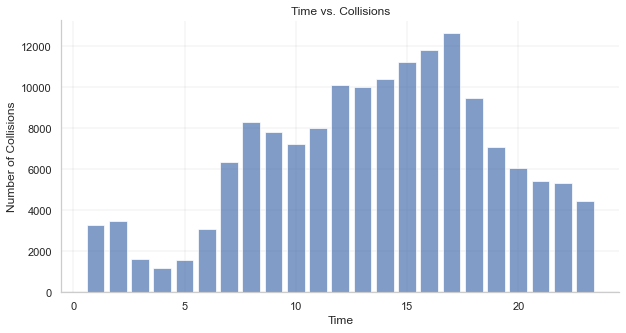

In [17]:

df4 = df.groupby('TIME')['Count'].sum().to_frame().reset_index().sort_values(by='Count')

df4 = df4.loc[df4.TIME > 0, ['Count', 'TIME']]
scatterplot(df4, "TIME", "Count", "TIME", "Time vs. Collisions", "Time", "Number of Collisions")

With the data cleaned again, we can clearly see that more accidents occur during the afternoon rush hour (as drivers are returning home from work) between 15:00 to 17:00 (3:00 PM to 5:00 PM).

In [18]:
#create barplot function

def barplot(df, x_dim, y_dim, category, maintitle, x_label, y_label):
  x = df[x_dim]
  y = df[y_dim]
  fig, ax = plt.subplots(figsize=(10, 5))
  #applies the custom color map along with the color sequence
  ax.barh(x, y, alpha=0.70)
 
  #adds a title and axes labels
  ax.set_title(maintitle)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()



In [19]:
def horzbarplot(df2, maintitle, x_label, y_label):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    
    ax = sns.barplot(x="Total", y="Type", hue="Severity", data=df2, palette="Blues_d")
  #adds a title and axes labels
    ax.set_title(maintitle)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
 
#removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
  #adds major gridlines
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()
 
  #adds major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()


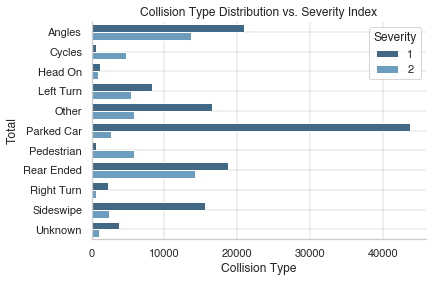

In [20]:
# Collision Type Graph

VAR = 'COLLISIONTYPE'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.COLLISIONTYPE.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Collision Type Distribution vs. Severity Index", "Collision Type","Total")

Collision type is an outcome attribute not a prediction attribute, therefore it will not be included in our model.
It is interesting to not that the most frequent type of collision is with parked cars. The collision types with the most severe 
kind are Read-Ended and Angles type collisions. 

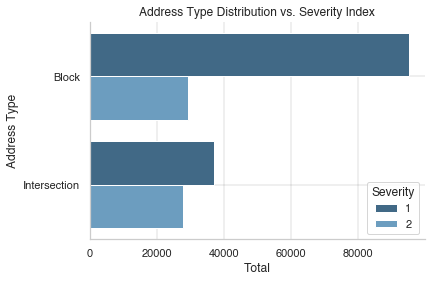

In [21]:
# Address Type Graph

VAR = 'ADDRTYPE'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.ADDRTYPE.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Address Type Distribution vs. Severity Index", "Total","Address Type")

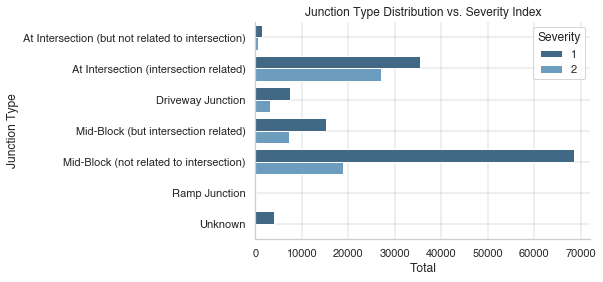

,Type,Severity,Total
0,At Intersection (but not related to intersection),1,1454
1,At Intersection (but not related to intersection),2,617
2,At Intersection (intersection related),1,35420
3,At Intersection (intersection related),2,27071
4,Driveway Junction,1,7359
5,Driveway Junction,2,3221
6,Mid-Block (but intersection related),1,15264
7,Mid-Block (but intersection related),2,7201
8,Mid-Block (not related to intersection),1,68628
9,Mid-Block (not related to intersection),2,18762


In [22]:
# JUNCTIONTYPE Graph

VAR = 'JUNCTIONTYPE'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.JUNCTIONTYPE.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Junction Type Distribution vs. Severity Index", "Total","Junction Type")

df2

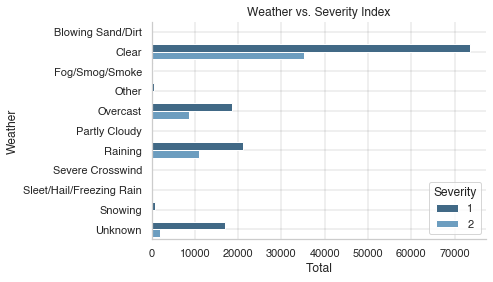

In [23]:
# Weather Graph

VAR = 'WEATHER'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.WEATHER.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Weather vs. Severity Index", "Total","Weather")



It appears that most collisions occur when the weather is clear. It is possible that more drivers are on the roads when conditions are better as opposed to when they are not favorable. 

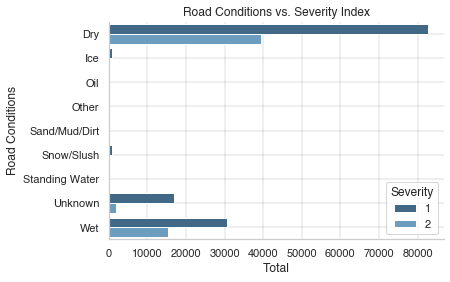

In [24]:
# Road Conditions Graph

VAR = 'ROADCOND'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.ROADCOND.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Road Conditions vs. Severity Index", "Total","Road Conditions")


Again, for road conditions the most accidents occur when the roads are Dry, followed by Wet. Perhaps indicative that drivers either drive more carefully when conditions are severe or drivers avoid driving at all. 

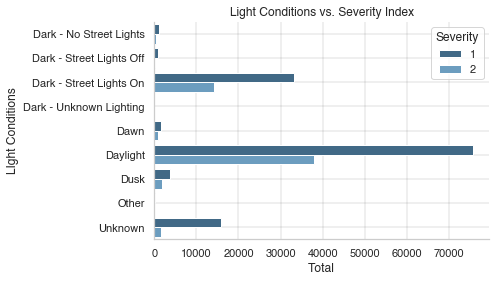

In [25]:
# Light Conditions Graph

VAR = 'LIGHTCOND'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.LIGHTCOND.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Light Conditions vs. Severity Index", "Total","LIght Conditions")


Again, for light conditions the most accidents occur when the roads are Daylight, followed by Dark - Street lights. Perhaps indicative that drivers are less likely to drive later in the evening and in the dark. 

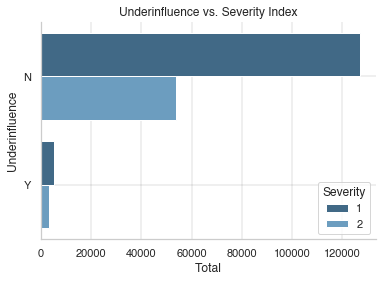

,Type,Severity,Total
0,N,1,126824
1,N,2,53634
2,Y,1,5397
3,Y,2,3484


In [26]:
# Under influence Conditions Graph\

df["UNDERINFL"].replace("0","N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)


VAR = 'UNDERINFL'
group_data = df.groupby([VAR,'SEVERITYCODE'])['Count'].sum()
group_data.to_frame().head()
new = pd.DataFrame(group_data)
new = new.reset_index(level=[0,1])

rowindex = new.UNDERINFL.array
sevindex = new.SEVERITYCODE.array
countindex = new.Count.array

df2 = pd.DataFrame({'Type' : rowindex, 'Severity' : sevindex, 'Total' :countindex })

horzbarplot(df2, "Underinfluence vs. Severity Index", "Total","Underinfluence")
df2


# World Map

In [27]:
import folium

In [28]:
seattle_map = folium.Map(location=[47.60357,-122.32945], zoom_start=8)

limit = 200 #Taking just a subset of data for visualization
df_inc = df.iloc[0:limit, :]
incidents = folium.map.FeatureGroup()

def color(SEV): 
    if SEV == 1: 
        col = 'green'
    else: 
        col='red'
    return col

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, SEV, in zip(df_inc.Y, df_inc.X, df.SEVERITYCODE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color = color(SEV),
            fill=False,
    
        )
    )

# add incidents to map
seattle_map.add_child(incidents)

Collisions appear focused around the city center, as would possibly be expected. 

# Data Modeling

## For this analysis, Logistic Regression was selected to: 
1. Determine the strength of the effect of important variables.
2. To provide a probability of occurence due to certain conditions. (Necessary for our predictive model)

## Steps
* load packages
* provide categorical variables dummy variables
* select the features for analysis 
* split the data into testing and training set


## SMOTE*
* The smote package was used to find and select with variables were important or redundant for logistic regression modelling.
* Column attributes with "FALSE" score were removed.
* The model was then fit using Logistic Regression
* Column attributes with p<0.1 were removed again
* The model was then finally refit using Logistic Regression


# Model Evaluation
* The final model accuracy was evaluated on the Training set and Test Set
* The Test accurarc was reported
* The Confusion matrix was reported
* The F1 score was reported
* The ROC curve was reported.


*The work for using the SMOTE package was based off of Towards Data Science. The link for the report can be accessed by this URL
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [29]:
from sklearn import preprocessing, metrics
from sklearn.metrics import jaccard_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

In [30]:
df["DAY"].replace("Sun", 1, inplace=True)
df["DAY"].replace("Mon", 2, inplace=True)
df["DAY"].replace("Tue", 3, inplace=True)
df["DAY"].replace("Wed", 4, inplace=True)
df["DAY"].replace("Thu", 5, inplace=True)
df["DAY"].replace("Fri", 6, inplace=True)
df["DAY"].replace("Sat", 7, inplace=True)

df["UNDERINFL"].replace("N", 0, inplace = True)
df["UNDERINFL"].replace("Y", 1, inplace = True)

Feature = df[['UNDERINFL','WEATHER','ROADCOND', 'LIGHTCOND', 'DAY', 'TIME']]

Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)

# To use the SMOTE package MAKE CERTAIN to remove duplicate column names 
# In our case, remove Other and Unknown
list = ['WEATHER','ROADCOND', 'LIGHTCOND', 'Other', 'Unknown']
Feature.drop(columns=list, inplace = True)

In [31]:
y_sev = df[["SEVERITYCODE"]]

# For logistic regression must be between 0 and 1
y_sev["SEVERITYCODE"].replace(1, 0, inplace = True)
y_sev["SEVERITYCODE"].replace(2, 1, inplace = True)


c:\users\reid\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [32]:
y = y_sev['SEVERITYCODE'].values
X = Feature
columns = X.columns.tolist()

In [33]:
from sklearn.model_selection import train_test_split

# Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151471, 26) (151471,)
Test set: (37868, 26) (37868,)


In [34]:
from collections import Counter
from numpy import where
from matplotlib import pyplot
counter_test = Counter(y_test)
counter_train = Counter(y_train)
print("The training set counter: ")
print(counter_train)
print("The test set counter: ")
print(counter_test)

The training set counter: 
Counter({0: 105970, 1: 45501})
The test set counter: 
Counter({0: 26251, 1: 11617})


In [35]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

In [37]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  185258
Number of no subscription in oversampled data 92629
Number of subscription 92629
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
# Recursive Feature Elimination to Stop overfitting
# The goal of RFE is to select features by recursively 
# considering smaller and smaller sets of features.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=Feature.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

The RFE has helped us select the following features: 'UNDERINFL', 'Clear', 'Overcast', 'Partly Cloudy','Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Standing Water', 'Wet',      
'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk'

And remove the following: 'DAY', 'TIME', 'Blowing Sand/Dirt', 'Fog/Smog/Smoke','Snow/Slush','Dark - No Street Lights', 

In [38]:
cols=[ 'Clear', 'Overcast', 'Partly Cloudy','Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Standing Water', 'Wet',       
'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk'] 
X=os_data_X[cols]
y=os_data_y['y']

In [39]:
# implement the model
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689827
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.005      
Dependent Variable:    y                  AIC:                255630.0175
Date:                  2020-09-05 15:27   BIC:                255822.4781
No. Observations:      185258             Log-Likelihood:     -1.2780e+05
Df Model:              18                 LL-Null:            -1.2841e+05
Df Residuals:          185239             LLR p-value:        3.9621e-250
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        5.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Clear                     0.1043   0.035

Attributes with p>0.05 were removed from the model
 
The following attributes were kept:
* 'Clear', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice',  'Sand/Mud/Dirt', 'Standing Water', 'Wet',     
'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'

In [40]:
cols=['Clear',  'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice',  'Sand/Mud/Dirt', 'Standing Water', 'Wet',     
'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'] 
X=os_data_X[cols]
y=os_data_y['y']

In [41]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689844
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689844
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.005      
Dependent Variable:    y                  AIC:                255628.3568
Date:                  2020-09-05 15:27   BIC:                255780.2994
No. Observations:      185258             Log-Likelihood:     -1.2780e+05
Df Model:              14                 LL-Null:            -1.2841e+05
Df Residuals:          185243             LLR p-value:        1.3489e-252
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        5.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        LR = LogisticRegression(C = c, solver = solver)
        LR.fit(X_train, y_train)
        lr_yhat = LR.predict(X_test)
        y_prob = LR.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')


Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.6732452084215078
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.67324526292438
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.6732460251954758
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.6732451553103818
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.6732453618449776


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.6734406600200303
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.6734414021860585
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.6735610014070127
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.6734414206402456
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.6734412683230999


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.676011279183308
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.6760116617328802
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6779248102175198
Test 14: Accuracy at C = 0.001 when

The best solver parameters are C = 0.001 and solver = liblinear

In [43]:
logreg = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)

# Predict the accuracy based on our 'in sample' test set
yhat=logreg.predict(X_test)

Jaccard = metrics.accuracy_score(y_test, yhat)
f1 = f1_score(y_test, yhat, average = 'weighted')
print(Jaccard, f1)

0.5597358667098492 0.5458906058170759


In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10655 17037]
 [ 7432 20454]]


The result is telling us that we have 8296+22488 () correct predictions and 5398+19396 () incorrect predictions.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.38      0.47     27692
           1       0.55      0.73      0.63     27886

    accuracy                           0.56     55578
   macro avg       0.57      0.56      0.55     55578
weighted avg       0.57      0.56      0.55     55578



ROC CURVE

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
The Jupyter notebook used to make this post is available here. I would be pleased to receive feedback or questions on any of the above.

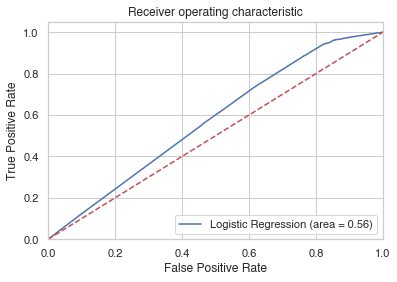

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# KNN Model

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Picking K values

Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


In [ ]:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
# Print the best K value
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
# Fit the model to the entire training set with k = 7

knn_model = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)

In [ ]:
# Predict the accuracy based on our 'in sample' test set
yhat=knn_model.predict(X_test)

Jaccard_knn = metrics.accuracy_score(y_test, yhat)
f1_knn = f1_score(y_test, yhat, average = 'weighted')
print(Jaccard_knn, f1_knn)

# Support Vector Machine

## SVM

In [ ]:
from sklearn.svm import SVC 

kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []
jaccard_score = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    jaccard_score.append(jaccard_similarity_score(y_test, svc_yhat))
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))

    
result = pd.DataFrame([jaccard_score, accuracy_score], index = ['Jaccard', 'F1'], columns = kernel_func)
result.columns.name = 'Evaluation Metrices'
new = result.transpose()
new.plot(kind = "bar")  

In [ ]:
# SVM Model
from sklearn.svm import SVC 
svc_model = SVC(C = 0.1, gamma = 'auto', kernel='linear')
svc_model.fit(X, y) 

In [ ]:
# Predict the accuracy based on our 'in sample' test set
yhat=svc_model.predict(X_test)

Jaccard = metrics.accuracy_score(y_test, yhat)
f1 = f1_score(y_test, yhat, average = 'weighted')
print(Jaccard, f1)